<a href="https://colab.research.google.com/github/prernac-dotcom/image_processing/blob/main/Fourier_transforms_and_frequency_domain_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#5 Fourier transforms and frequency-domain processing

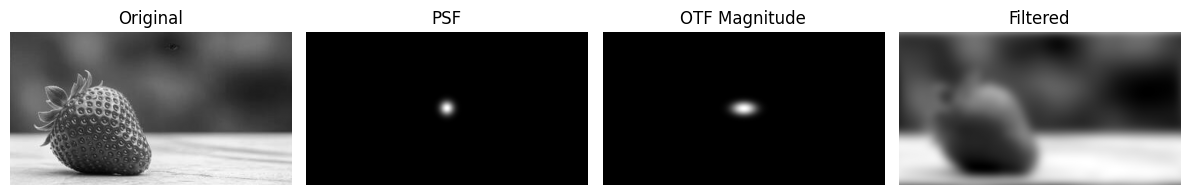

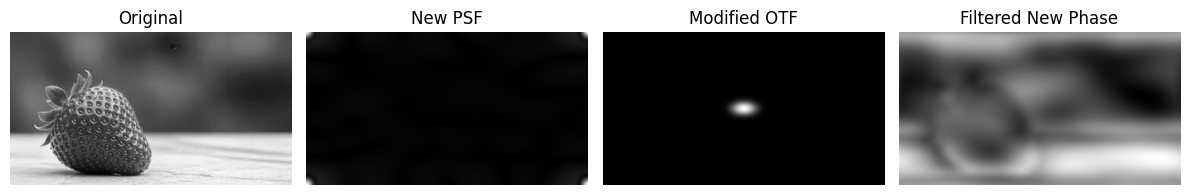

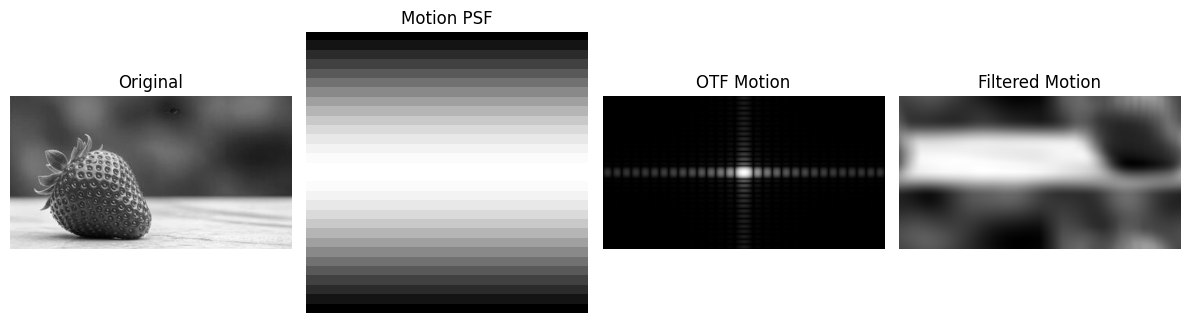

In [ ]:
# Performing frequency domain filtering using FFT and visualize PSF, OTF, and filtered results.
import cv2, numpy as np, matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

A = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
FA = fftshift(fft2(A))
psf = cv2.getGaussianKernel(A.shape[0], 6) @ cv2.getGaussianKernel(A.shape[1], 6).T
otf = fftshift(fft2(psf))
Afilt = np.abs(fftshift(ifft2(otf * FA)))
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(A, cmap='gray'); plt.axis('off'); plt.title('Original')
plt.subplot(1, 4, 2); plt.imshow(np.log1p(psf), cmap='gray'); plt.axis('off'); plt.title('PSF')
plt.subplot(1, 4, 3); plt.imshow(np.log1p(np.abs(otf)), cmap='gray'); plt.axis('off'); plt.title('OTF Magnitude')
plt.subplot(1, 4, 4); plt.imshow(Afilt, cmap='gray'); plt.axis('off'); plt.title('Filtered'); plt.tight_layout(); plt.show()

rlow, rhigh = A.shape[0]//2 - 3, A.shape[0]//2 + 3
clow, chigh = A.shape[1]//2 - 3, A.shape[1]//2 + 3
Fphase = np.angle(otf)
Fphase[rlow:rhigh, clow:chigh] += np.pi * np.random.rand(6, 6)
otf_new = np.abs(otf) * np.exp(1j * Fphase)
Afilt = np.abs(fftshift(ifft2(otf_new * FA)))
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(A, cmap='gray'); plt.axis('off'); plt.title('Original')
plt.subplot(1, 4, 2); plt.imshow(np.log1p(np.abs(ifftshift(ifft2(otf_new)))), cmap='gray'); plt.axis('off'); plt.title('New PSF')
plt.subplot(1, 4, 3); plt.imshow(np.log1p(np.abs(otf_new)), cmap='gray'); plt.axis('off'); plt.title('Modified OTF')
plt.subplot(1, 4, 4); plt.imshow(Afilt, cmap='gray'); plt.axis('off'); plt.title('Filtered New Phase'); plt.tight_layout(); plt.show()

psf_motion = cv2.getGaussianKernel(30, 10) @ np.ones((1, 30))
otf_motion = fftshift(fft2(psf_motion, s=A.shape))
Afilt_motion = np.abs(fftshift(ifft2(otf_motion * FA)))
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(A, cmap='gray'); plt.axis('off'); plt.title('Original')
plt.subplot(1, 4, 2); plt.imshow(np.log1p(psf_motion), cmap='gray'); plt.axis('off'); plt.title('Motion PSF')
plt.subplot(1, 4, 3); plt.imshow(np.log1p(np.abs(otf_motion)), cmap='gray'); plt.axis('off'); plt.title('OTF Motion')
plt.subplot(1, 4, 4); plt.imshow(Afilt_motion, cmap='gray'); plt.axis('off'); plt.title('Filtered Motion'); plt.tight_layout(); plt.show()


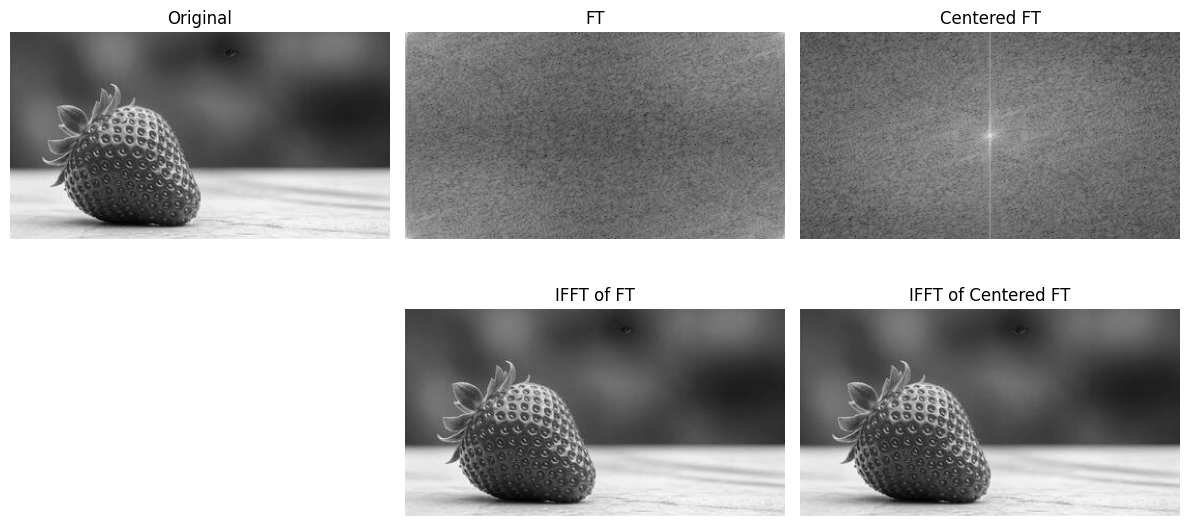

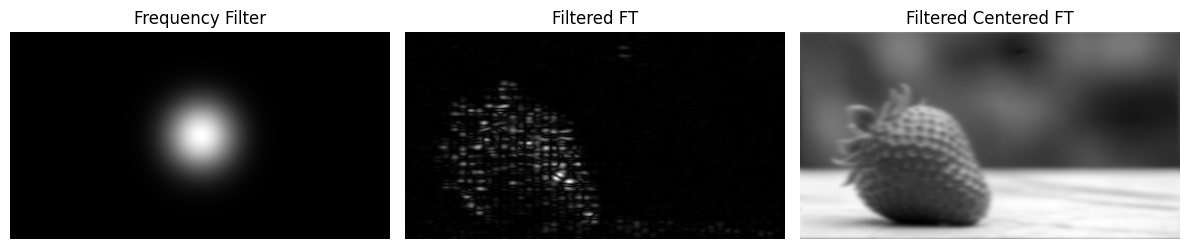

In [ ]:
# Illustrate FFT, fftshift, and frequency domain filtering on an image.
import cv2, numpy as np, matplotlib.pyplot as plt

A = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
FT = np.fft.fft2(A)
FT_c = np.fft.fftshift(FT)

plt.figure(figsize=(12,6))
plt.subplot(2,3,1); plt.imshow(A, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(np.log1p(np.abs(FT)), cmap='gray'); plt.title('FT'); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(np.log1p(np.abs(FT_c)), cmap='gray'); plt.title('Centered FT'); plt.axis('off')
Im1 = np.abs(np.fft.ifft2(FT))
Im2 = np.abs(np.fft.ifft2(FT_c))
plt.subplot(2,3,5); plt.imshow(Im1, cmap='gray'); plt.title('IFFT of FT'); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(Im2, cmap='gray'); plt.title('IFFT of Centered FT'); plt.axis('off')
plt.tight_layout(); plt.show()

xd, yd = A.shape
x = np.linspace(-xd//2, xd//2 - 1, xd)
y = np.linspace(-yd//2, yd//2 - 1, yd)
X, Y = np.meshgrid(y, x)
sigma = 32
arg = (X**2 + Y**2) / sigma**2
frqfilt = np.exp(-arg)

imfilt1 = np.abs(np.fft.ifft2(frqfilt * FT))
imfilt2 = np.abs(np.fft.ifft2(frqfilt * FT_c))
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(frqfilt, cmap='gray'); plt.title('Frequency Filter'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(imfilt1, cmap='gray'); plt.title('Filtered FT'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(imfilt2, cmap='gray'); plt.title('Filtered Centered FT'); plt.axis('off')
plt.tight_layout(); plt.show()
